In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data = pd.read_csv("C:/Users/suman/Downloads/website.csv")
data.sample(5)

,Date,Views
36,07/07/2021,7609
150,29/10/2021,9006
151,30/10/2021,7586
195,13/12/2021,8685
229,16/01/2022,6570


In [3]:
data["Date"] = pd.to_datetime(data["Date"],format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


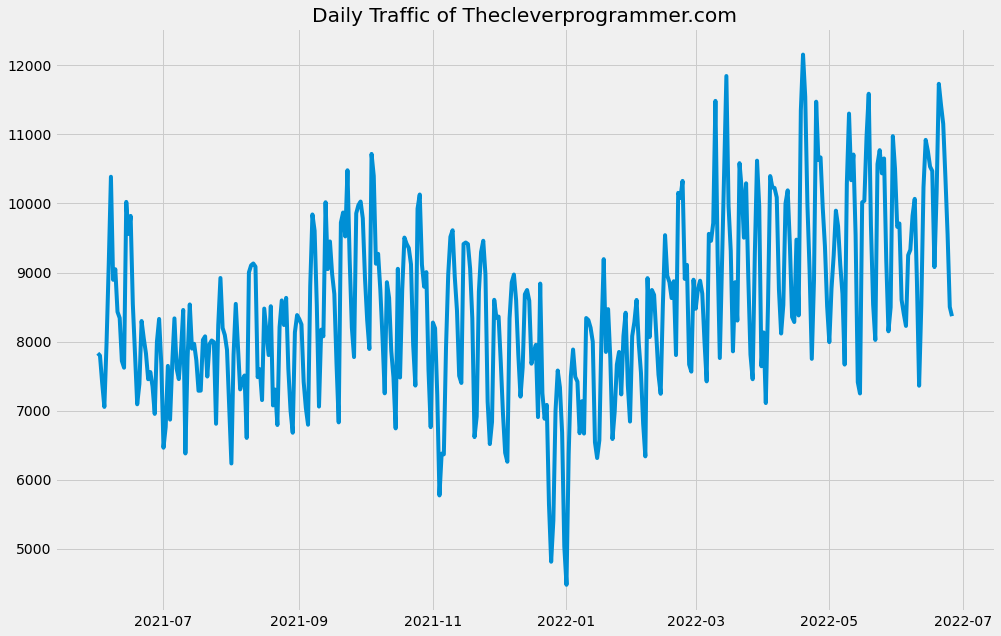

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

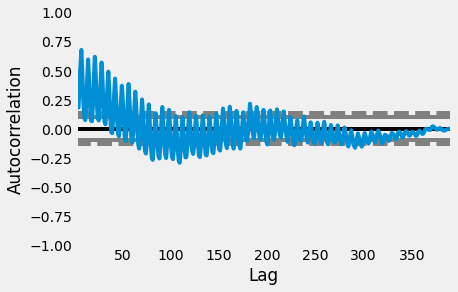

In [7]:
pd.plotting.autocorrelation_plot(data["Views"])

C:\Users\suman\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


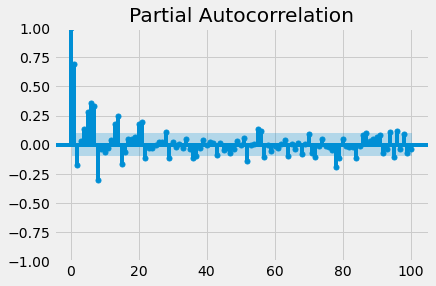

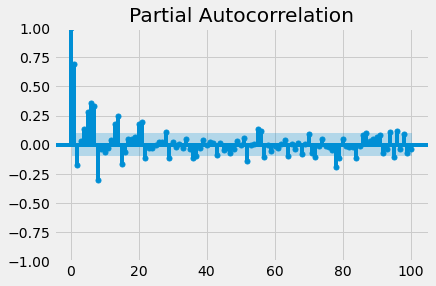

In [8]:
plot_pacf(data["Views"], lags = 100)

In [9]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\suman\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\suman\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.139
Date:                            Sat, 01 Oct 2022   AIC                           6228.277
Time:                                    11:19:32   BIC                           6287.301
Sample:                                         0   HQIC                          6251.703
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7589      0.130      5.836      0.000       0.504       1.014
ar.L2         -0.7668      0.134   

In [10]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9854.492034
392    10796.732368
393    10761.585888
394     9863.735499
395     8786.257096
396     8236.101749
397     8915.134680
398     9691.209765
399    10296.077172
400    10625.604691
401     9892.170151
402     9354.111805
403     9001.831805
404     9047.684966
405    10492.687548
406    10998.517675
407    10927.047993
408    10122.523554
409     9451.327322
410     8610.319145
411     9136.485774
412    10340.304242
413    10635.435004
414    10829.316903
415    10284.356054
416     9450.009530
417     8994.425778
418     9120.895350
419     9895.410084
420    10278.945917
421    10767.303060
422     9949.957557
423     9544.814509
424     8997.516206
425     8799.341586
426    10118.011827
427    10864.479067
428    10942.654200
429    10423.116375
430     9443.632836
431     8663.400932
432     8683.220514
433    10045.728545
434    10536.910642
435    10883.833399
436    10496.821087
437     9354.073042
438     9149.203556
439     9320.918900
440    10272.360259


<AxesSubplot:>

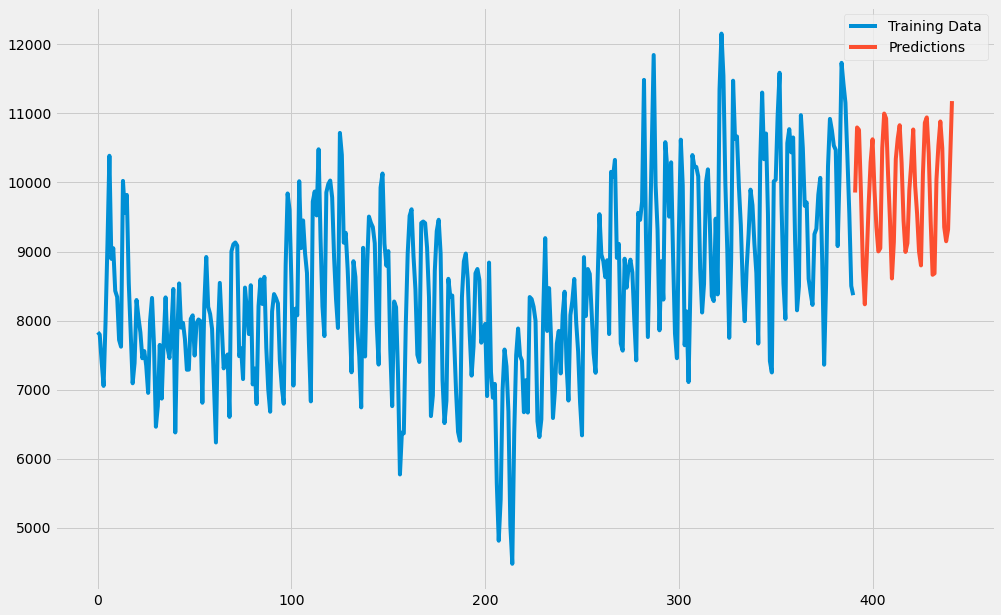

In [11]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")